<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool10_StatisticalData/blob/main/DATA04_%EB%B6%84%ED%8F%AC%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 분포 모형
- 확률 변수의 값들이 갖는 빈도/가능성 나타내는 함수
- 특정한 분포 형태에 따라 이름이 붙고, 특정한 성질/특성 가짐

>## 1) 대표적인 분포모형
>- 정규분포 : 대칭적인 종 모양 분포 / 평균, 표준편차에 따른 모양 결정
>- 이항분포 : 이항시행에서 성공 횟수에 대한 분포
>- 포아송분포 : 단위시간/공간에서 발생하는 사건의 수
>- 지수분포 : 사건이 발생하는데 걸리는 시간 나타내는 분포


>## 2) 확률분포

>>### (1) 확률분포 개념
>>- 어떤사건이 발생할 확률을 수학적으로 표현한 함수
>>- 이항분포, 정규분포, 포아송분포, 지수분포 
>>- 선거결과 예측 위한 여론조사 

>>### (2) 확률밀도함수
>>- 확률분포 특정 구간 내에서 확률의 밀도(농도)를 나타내는 함수
>>- 확률변수가 취할 수 있는 모든 값에 대해 정의되고 적분시 확률값으로 해석할 수 있음
>>- 특정 구간내에 있을 확률 구하기

>>### (3) 누적분포함수
>>- 확률변수 X가 어떤 값보다 작거나 같을 확률 나타내는 함수
>>- 주사위 던져서 3보다 작거나 같을 확률

>>### (4) 확률질량함수
>>- 이산형 확률 변수에서 확률 값 구하는 함수
>>- 이산형 확률 변수는 확률 값을 가지는 유한개/무한개 값 중 하나를 취하는 확률 변수

>## 3) 정규분포

>>### (1) 정규분포 개념
>>- 종모양의 분포, 일반적임
>>- 평균(분포의 중심), 분산(분포의 넓이)으로 설명
>>- 많은 데이터 세트를 설명하는데 사용할 수 있어 유용함

>>### (2) 표준정규분포 표준화 과정
>>- 표준정규분포 : 평균0, 표준편차1
>>- 표준화 과정 : 데이터에서 평균빼기 → 결과를 표준편차로 나눔
>>- 표준화과정을 거치면 원데이터는 표준정규분포를 따르는 데이터로 변환됨 

>>### (3) 정규분포 활용예시
>>- 평균, 분산, 데이터가 특정 범위 내에 있을 확률 계산
>>- 신체크기, 시험점수, 주식가격, 기상조건, 공정불량률

>>### (4) 정규분포 실습
>>- 랜덤 100명의 키와 체중 데이터 생성 후 csv 파일 저장 및 시각화

In [2]:
import numpy as np
import pandas as pd

#데이터생성
np.random.seed(42)
height = np.random.normal(loc=170, scale=10, size=100)
weight = np.random.normal(loc=70, scale=5, size=100)

#데이터를 DataFrame으로 변환 후 CSV 파일로 저장
data = pd.DataFrame({'Height': height, 'Weight' : weight})
data.to_csv('human_data.csv', index=False)

print(data)

        Height     Weight
0   174.967142  62.923146
1   168.617357  67.896773
2   176.476885  68.286427
3   185.230299  65.988614
4   167.658466  69.193571
..         ...        ...
95  155.364851  71.926587
96  172.961203  65.580713
97  172.610553  70.768626
98  170.051135  70.291044
99  167.654129  64.285149

[100 rows x 2 columns]


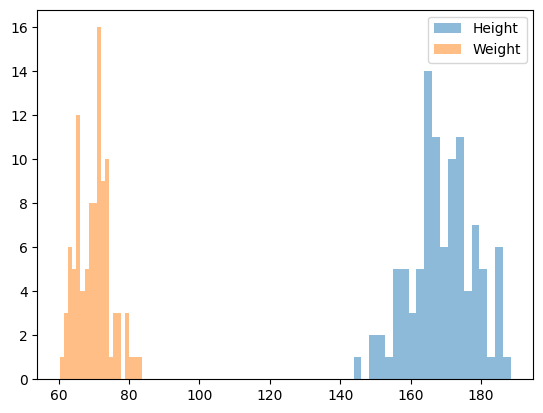

In [15]:
#정규분포데이터 시각화

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

#CSV파일 불러오기
data = pd.read_csv('human_data.csv')

#키와 체중 데이터 추출
hight = data['Height']
weight = data['Weight']

#데이터 분포 시각화
plt.hist(height, bins=20, alpha=0.5, label='Height')
plt.hist(weight, bins=20, alpha=0.5, label='Weight')
plt.legend(loc='upper right')
plt.show()

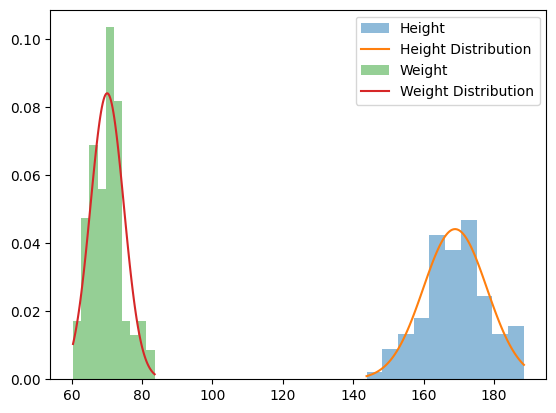

In [16]:
#정규분포실습

#키에 대한 정규분포 모델링
height_mean, height_std = norm.fit(height)
height_x = np.linspace(height.min(), height.max(), 100)
height_y = norm.pdf(height_x, height_mean, height_std)

#체중에 대한 정규분포 모델링 
weight_mean, weight_std = norm.fit(weight)
weight_x = np.linspace(weight.min(), weight.max(), 100)
weight_y = norm.pdf(weight_x, weight_mean, weight_std)

#모델링 결과 시각화
plt.hist(height, bins=10, density=True, alpha=0.5, label='Height')
plt.plot(height_x, height_y, label='Height Distribution')

plt.hist(weight, bins=10, density=True, alpha=0.5, label='Weight')
plt.plot(weight_x, weight_y, label='Weight Distribution')

plt.legend(loc='upper right')
plt.show()

>## 4) 이항분포

>>### (1) 이항분포 개념
>>- 독립적인 사건이 두가지 결과만 가지는 경우 사용되는 확률분포
>>- 동전 던지기 경우 앞면이 나올 확률
>>- 확률변수 : 성공의 횟수 / 정수값
>>- 확률질량함수(PMF) : 시행횟수, 성공확률, 성공횟수에 대한 확률
>>- 평균 : 시행횟수 x 성공확률
>>- 분산 : 시행횟수 x 성공확률 x 실패확률

>>### (2) 이항분포 확률 계산 방법
>>- 이상계수 : n개중에 성공 갯수
>>- 확률계산 : P(X=k) = (n choose k) * p^k * (1-p)^(n-k)
>>- P(X=k) : k 번의 성공 확률
>>- (n choose k) : 이항계수를 나타내며, n 개 중에서 k 개를 선택하는 경우의 수
>>- p: 성공 확률
>>- (1-p): 실패 확률
>>- k: 성공 횟수
>>- n: 시행 횟수


>>### (3) 이항분포 활용예시
>>- 동전던지기 앞면 나올 확률
>>- 품질관리 생산불량품 비율 예측
>>- 설문조사의 특정 응답 유형 발생 확률


>>### (4) 이항분포 실습

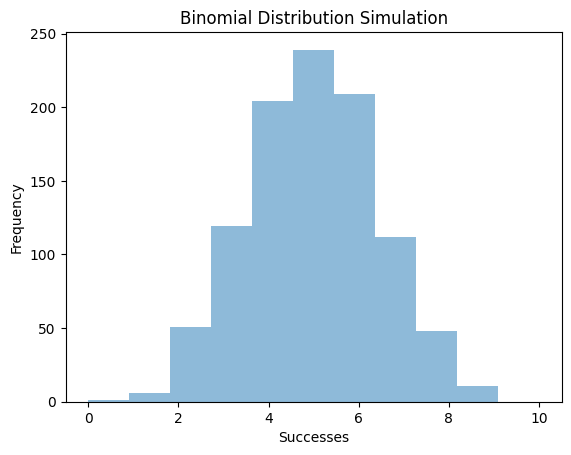

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

#이항분포 모델링
n = 10    #시행횟수
p = 0.5   #성공확률

#이항분포 시뮬레이션
num_simulations = 1000    #시뮬레이션 횟수
successes = np.random.binomial(n, p, num_simulations)

#이항분포 시뮬레이션 결과 시각화
plt.hist(successes, bins=11, range=(0, 10), alpha=0.5)
plt.xlabel('Successes')
plt.ylabel('Frequency')
plt.title('Binomial Distribution Simulation')
plt.show()

>## 5) 포아송 분포 개념

>>### (1) 포아송분포 개념
>>- 특정 시간/공간에서 일어나는 사건의 발생횟수 모델링하는데 사용되는 확률 분포
>>- 하루의 이메일수, 초당 트래픽수 예측 등 사용

>>### (2) 포아송분포 특징
>>- 포아송 분포 확률 변수 : 단위시간/공간에서 발생한 사건의 수
>>- 사건발생률 : 공간에서 평균적으로 발생하는 사건의 수(모수)
>>- 확률질량함수 : 사건발생률과 특정 사건 수에 대한 확률 계산
>>- 평균과 분산 : 사건발생률과 동일
>>- 독립성 : 사건은 독립적으로 발생한다고 가정(다른 사건에 영향X)
>>- 발생 빈도가 일정하다고 가정

>>### (3) 포아송분포 활용예시
>>- 트래픽분석
>>- 고객서비스 : 고객이 센터에 도착하는 시간, 서비스를 요청하는 횟수
>>- 자연재해 : 지진, 홍수, 번개 자연재해 발생빈도
>>- 의료통계 : 질병발생률, 병원입원환자수 등
>>- 생물학 : 유전자 돌연변이 발생률 등

>>### (4) 포아송 분포 실습

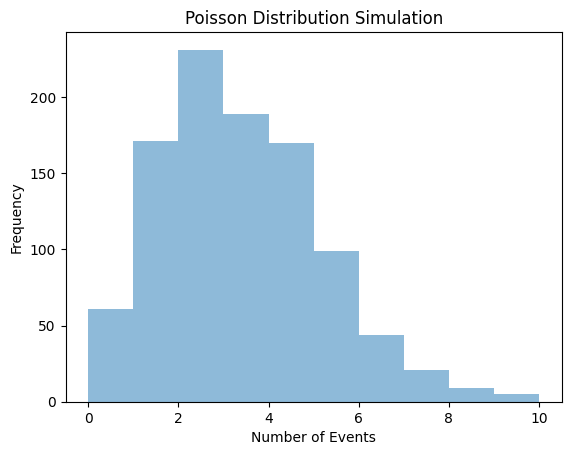

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson 

#포아송 분포 모델링
lambda_param = 3    #사건발생 평균횟수

#포아송 분포 시뮬레이션
num_simulations = 1000
events = np.random.poisson(lambda_param, num_simulations)

#포아송 분포 시뮬레이션 결과 시각화
plt.hist(events, bins=10, alpha=0.5)
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.title('Poisson Distribution Simulation')
plt.show()

>## 4) 지수분포

>>### (1) 지수분포 개념
>>- 특정한 사건 일어나도 다음 사건 일어날때까지 걸리는 시간에 대한 분포
>>- 분포 : 모수 / 사건이 일어날 평균 시간
>>- 평균 = 분산 = 1/람다
>>- 무기억성 : 사건이 일어난 후 다음 사건이 일어날때까지 걸리는 시간은 이전 사건이 일어난 시간과 무관
>>- 왼쪽으로 치우친 분포

>>### (2) 지수분포 특징
>>- 사건발생간격이 지수적으로 분포한다고 가정
>>- 사건간격 : 양수 / 지수분포 : 0이상의 실수
>>- 확률밀도 함수 오른쪽으로 급격히 감소하는 형태
>>- 람다 클수록 대기시간 등 예측 길어짐

>>### (3) 활용예시
>>- 재고관리 : 재고 소진시까지 걸리는 시간 예측
>>- 신뢰성공학 : 제품이 고장날때까지 걸리는 시간 예측
>>- 확률이론 : 확률사건 일어날때까지 걸리는 시간 예측
>>- 서비스대기시간 예측 : 고객대기시간 예측
>>- 시스템 유지 보수 : 기계, 시설, 장비 고장 발생 간격
>>- 품질관리 : 제품불량발생간격
>>- 금융분야 : 주식가격, 환율 변동 이벤트 간격 예측
>>- 통신네트워크 : 데이터패킷 도착 간격, 전송속도 등

>>### (4) 지수분포 실습
>>- 고객서비스 센터 대기시간 분포 측정

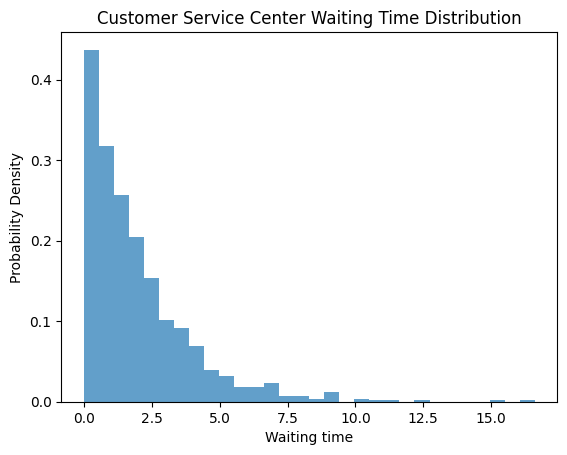

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

#고객 서비스 센터 대기 시간을 모델링하는 지수분포 생성 함수
def generate_waiting_time(lam, size):
  return np.random.exponential(scale=1/lam, size=size)

#고객 서비스 센터 대기 시간 분포 측정 및 시각화
def measure_waiting_time(lam, num_samples):
  waiting_times = generate_waiting_time(lam, num_samples)

  #대기시간 분포 히스토그램
  plt.hist(waiting_times, bins=30, density=True, alpha=0.7)
  plt.xlabel('Waiting time')
  plt.ylabel('Probability Density')
  plt.title('Customer Service Center Waiting Time Distribution')
  plt.show()

#모수 설정
lam = 0.5   #지수분포의 lamda값 (대기시간수 : 0.5의 역수 -> 2시간)

#대기시간 분포 측정 및 시각화 실행 
num_samples = 1000    #생성할 샘플 수
measure_waiting_time(lam, num_samples)

>## 5) 감마분포

>>### (1) 감마분포 개념
>>- 연속 확률분포의 하나
>>- 양의 실수 값을 가지는 변수에 대해 사용

>>### (2) 감마분포의 특징
>>- 양수인 실수값을 가짐
>>- 형상모수(분포의모양), 비율모수(분포의폭) 가짐
>>- 지수분포는 감마분포의 특수한 경우로 생각
>>- 평균 : 형상모수/비율모수, 형상모수/비율모수제곱
>>- 확률계산 : 누적분포함수와 확률밀도함수 사용
>>- 누적분포함수 : 특정값보다 작거나 같을 확률
>>- 확률밀도함수 : 특정값에서의 확률변수 밀도


>>### (3) 감마분포 활용예시
>>- 신뢰성분석 : 제품, 장치 수명 모델링
>>- 대기시간분석 : 고객센터 대기시간 분석
>>- 금융분석 : 금융 수익률 모델링
>>- 통계적모델링 : 사건발생간격, 소요시간, 수명 등

>>### (4) 감마분포 실습 
>>- 제품 고장까지 걸리는 시간

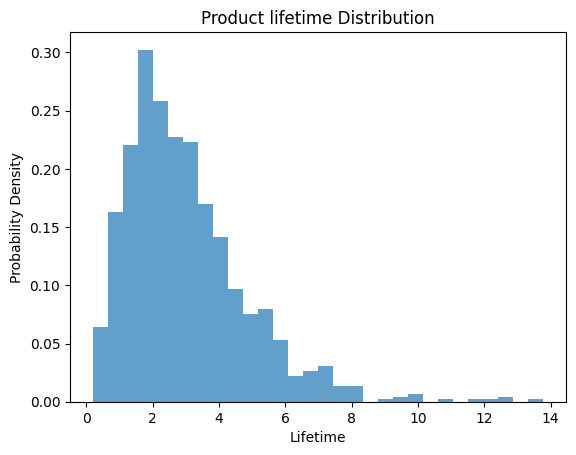

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

#제품의 고장까지 걸리는 시간을 모델링하는 감마분포 생성함수
def generate_lifetime(alpha, beta, size):
  return np.random.gamma(shape=alpha, scale=beta, size=size)

#제품의 고장까지 걸리는 시간 분포 측정 및 시각화
def measure_lifetime(alpha, beta, num_samples):
  lifetime = generate_lifetime(alpha, beta, num_samples)
  
  #고장까지 걸리는 시간 분포 히스토그램
  plt.hist(lifetime, bins=30, density=True, alpha=0.7)
  plt.xlabel('Lifetime')
  plt.ylabel('Probability Density')
  plt.title('Product lifetime Distribution')
  plt.show()

#모수설정
alpha = 2.5
beta = 1.2

#고장까지 걸리는 시간 분포 측정 및 시각화
num_samples = 1000
measure_lifetime(alpha, beta, num_samples)

>## 5) 베타분포

>>### (1) 베타분포 개념
>>- 0~1사이 값 가지는 확률변수 모델링하는데 사용되는 연속형 확률분포
>>- 모수 : 알파, 베타 
>>- 범위제한 : 0~1사이제한 / 성공확률,실패확률,성공-실패비율 표현 사용
>>- 유연성 : 알파베타 값에 따라 다양한 모양의 분포 형성 가능

>>### (2) 베타분포 특징 
>>- 베이지안 추론 : 베이지안추론에서 사전분포로 정의한 후 데이터 통해 사후분포 업데이트 후 추론에 사용
>>- 베타-이진모델링 : 이상분포의 사전분포로 사용
>>- 확률계산 : 베타함수 사용하여 정규화 상수 계산하는데 사용
>>- 누적분포함수 : 베타함수로 값보다 작은 확률 나타냄
>>- 확률밀도함수 : 주어진 값에서 확률 밀도

>>### (3) 베타분포 활용예시
>>- A/B 테스트 : 두가지 다른버전의 웹페이지, 광고 비교실험 
>>- 성공확률모델 : 이항분포의 성공확률 모델링한ㄴ데 사용함
>>- 베이지안추론 : 어떤 사건이 발생하기 전에 가지고 있는 믿음이나 확률분포 나타내는 사전분포로 베이지안 추론에 이용됨

>>### (4) 베타분포 모형실습
>>- 사용자 행동 데이터의 분포 시각화

[0.50419403 0.67109985 0.60268911 0.69268308 0.72226544 0.61902123
 0.5665866  0.712814   0.5859733  0.57622523 0.59601615 0.65907448
 0.49559733 0.46218053 0.7548865  0.74376628 0.47651208 0.46773592
 0.54886028 0.56054226 0.8126983  0.77012834 0.78114907 0.63400272
 0.63772826 0.70037092 0.61211432 0.72331439 0.87182548 0.66819086
 0.81682984 0.59276827 0.86749282 0.86614277 0.75335566 0.73273316
 0.845367   0.72974664 0.76243386 0.55537012 0.50420228 0.77661977
 0.66544711 0.67410715 0.59887287 0.61443399 0.73283352 0.73179083
 0.70318991 0.48243018 0.80559955 0.53845776 0.73346363 0.81659638
 0.44524739 0.68226407 0.61846268 0.60762819 0.68170056 0.55615433
 0.72551086 0.53893166 0.28981922 0.65583499 0.56598026 0.49039733
 0.54103027 0.56214929 0.60162593 0.58122282 0.68787558 0.50354485
 0.6564171  0.74150201 0.76392677 0.85556576 0.82814322 0.61830085
 0.66800102 0.62598836 0.538645   0.61288906 0.583924   0.7459632
 0.86121406 0.67839139 0.52580651 0.56113113 0.63636821 0.45623

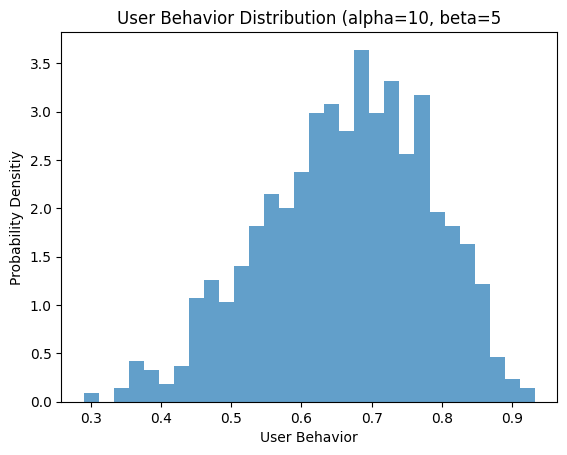

In [17]:
#0~1 사이 데이터 1000개 생성

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#모수설정
alpha = 10   #모수:알파 / 분포 좌측부분 영향
beta = 5     #모수:베타 / 분포 우측부분 영향

#랜덤으로 사용자 행동 데이터 생성(0~1사이 값)
user_data = np.random.beta(alpha, beta, size=1000)
print(user_data)

#데이터 분포 시각화
plt.hist(user_data, bins=30, density=True, alpha=0.7)
plt.xlabel('User Behavior')
plt.ylabel('Probability Densitiy')
plt.title('User Behavior Distribution (alpha={}, beta={}'.format(alpha, beta))
plt.show()

>## 6) 카이제곱 분포


>>### (1) 카이제곱분포 개념
>>- 정규분포 따르는 독립적인 확률변수 제곱의 합
>>- 합산하는 정규분포 개수 : 자유도
>>- 카이제곱 분포의 형태와 특성을 결정하는 중요한 매개변수
>>- 항상 양수, 0에 가까울수록 확률 감소
>>- 모양은 자유도에 의해 결정 : 자유도 커질수록 정규분포에 가깝고 분산 커짐
>>- 평균 : 자유도에 의존
>>- 분산 : 2배의 자유도
>>- 중심극한정리에 따라 자유도 큰 경우 근사적 정규분포에 수렴

>>### (2) 카이제곱 모형 활용 예시
>>- 독립성 검정에 사용
>>- 카이제곱 군집화 : 클러스터링 알고리즘 k-means 클러스터링과 함께 사용하여 클러스터간 분산 평가
>>- 통계적 모델 검증 : 카이제곱 분포는 통계적 모델의 적합성 평가하는데 사용
>>- 신뢰도 분석 : 신뢰도 구간 계산할 때
>>- 자료의 적합성 검정 : 특정 분포에 적합한지 검정하기 위해 카이제곱 검정 사용할 수 있음

>>### (3) 카이제곱 모형 실습
>>- 자유도가 5인 카이제곱 분포 따르는 랜덤변수 생성 후 히스토그램 시각화
>>- x:랜덤변수의 값, y:해당값의 확률밀도
>>- 분포의 모양 

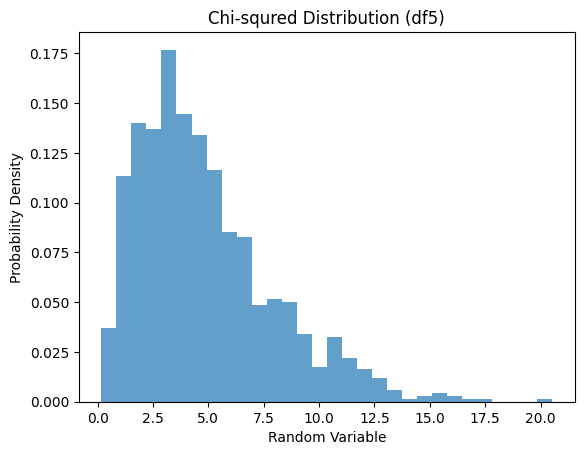

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#모수 설정
df=5   #자유도(degrees of freedom)

#카이제곱 분포에서 랜덤 변수 생성
random_variable = np.random.chisquare(df, size=1000)

#분포시각화
plt.hist(random_variable, bins=30, density=True, alpha=0.7)
plt.xlabel('Random Variable')
plt.ylabel('Probability Density')
plt.title('Chi-squred Distribution (df{})'.format(df))
plt.show()

>## 7) T-분포

>>### (1) T분포 개념
>>- 통계학 확률 분포 중 하나
>>- 평균의 추정, 가설검정에서 활용
>>- 정규 분포 따르는 모집단에서 표본 추출하여 모평균 추정시, 표본크기에 따라 발생하는 변동성 고려시 사용됨

>>### (2) T분포 특징
>>- 통계학에서 사용되는 확률 분포 중 하나
>>- 표본평균의 분포
>>- 정규분포를 따르는 모집단에서 표본을 추출할때, 표본평균 이용하여 모평균 추정하거나 가설검정 수행할때 사용
>>- T-분포 표본크기 따라 모양 변함
>>- 신뢰구간추정, t-검정, 회귀분석 등 다양한 통계적 분석에 사용
>>- 확률계산 : 누적분포함수 활용

>>### (3) T분포 활용예시
>>- 통계적 가설 검정에서 활용
>>- 두 그룹 간 평균 차이 비교 : 구 버전과 뉴버전의 성능 차이 비교 등
>>- 회귀분석 : 독립변수와 종속 변수 간의 관계 분석

>>### (4) T분포 실습
>>- X : T값
>>- Y : T값의 빈도수
>>- 자유도에 따라 달라짐

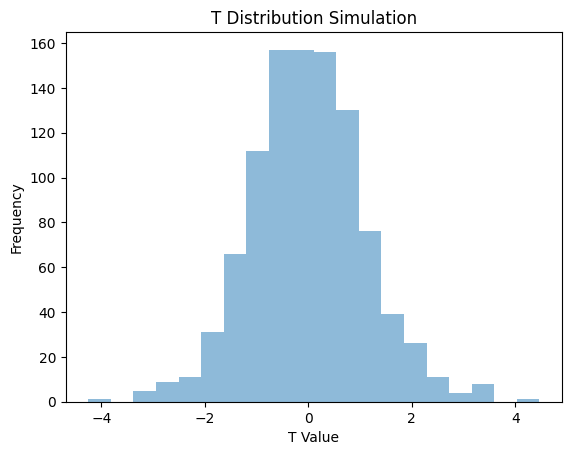

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

#자유도
df=10  

#시뮬레이션 횟수
num_simulations = 1000 
t_values = np.random.standard_t(df, num_simulations)

plt.hist(t_values, bins=20, alpha=0.5)
plt.xlabel('T Value')
plt.ylabel('Frequency')
plt.title('T Distribution Simulation')
plt.show()

>## 8) F 분포

>>### (1) F분포 개념
>>- 분산비교 및 분산분석 활용되는 확률 분포
>>- 두개 이상 그룹 분산이 동일한지 비교
>>- 회귀 분석 모델의 적합도 평가
>>- 자유도 매개변수 : df1(분자의 자유도), df2(분산참여그룹수)

>>### (2) F분포 특징
>>- 비대칭성 : 오른쪽으로 긴꼬리 가지는 비대칭 분포
>>- 정의범위 : 항상 양수, 0에서 무한대까지
>>- 분포형태 : 자유도에 따라 형태 변화 - 증가할수록 F분포 꼬리 짧아지고 분포 뾰족한 형태가짐

>>### (3) F분포 활용예시
>>- 분산비교 : 그룹간 분산 비교 사용
>>- 회귀분석 : F분포 회귀모델 적합도 평가에 사용
>>- ANOVA(분산분석) : 다수 그룹간 평균비교
>>- 자유도검정 : 두개 독립적인 추정량 분산 비율 평가

>>### (4) F분포 실습
>>- x : f값
>>- y : f값 빈도수
>>- F분포모양 : 자유도에 따라 달라짐
>>- 오른쪽으로 긴꼬리 가지는 형태
>>- 자유도 증가시 분포 평평해짐

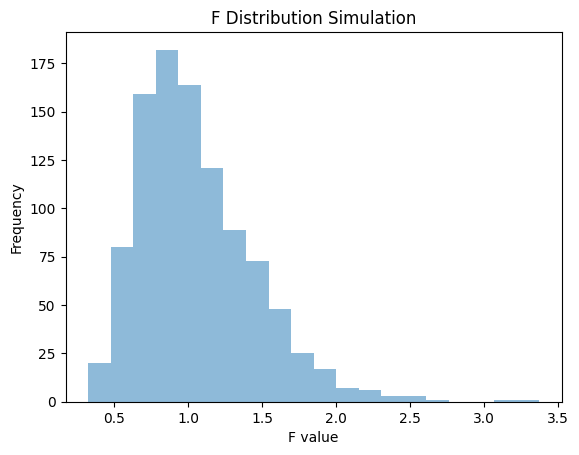

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# F분포 모델링
dfn = 30   #자유도1
dfd = 30  #자유도2

# F분포 시뮬레이션
num_simulations = 1000  #시뮬레이션 횟수
f_values = np.random.f(dfn, dfd, num_simulations)

# F분포 시뮬레이션 결과 시각화
plt.hist(f_values, bins=20, alpha=0.5)
plt.xlabel('F value')
plt.ylabel('Frequency')
plt.title('F Distribution Simulation')
plt.show()

---

# 2. 분포 모형 사용하여 데이터 분석시 주의사항 및 평가방법 소개

>## 1) 주의사항
>- 데이터 분포 가정 : 분포 모형의 적합성 평가가 사전적으로 필요함
>- 모수 추정 : 표본크기, 추정방법, 초기값 등 결과가 달라질 수 있음어서 적절한 추정 방법 선택 필요함
>- 데이터 크기 : 데이터 크기가 충분히 큰지 확인해야함
>- 이상치처리 : 이상치 탐지 및 처리방법에 주의 기울여야 함
>- 가정검토 : 가정이 실제데이터와 일치하는지 검토해야 함

>## 2) 분포 모형 평가 방법 소개
>- 시각적평가 : 분포 모형과 실제 데이터의 분포를 시각적으로 비교
>- 기술적 평가 : 분포 모형 특징을 정량적으로 평가
>- 확률적 평가 : 분포 모형 사용하여 데이터 생성, 생성된 데이터와 실제 데이터 간에 통계적 검정 수행 및 적합성 평가
>- 정보기준 : 복잡성, 적합도 고려하는 정보기준을 사용하여 모형 평가